In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
import sklearn.datasets
import os

In [28]:
im = imageio.imread("/content/3.pgm")
im = im.astype(np.uint8)

print(im)

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


<ipython-input-28-8ec06fa9b4e5>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread("/content/3.pgm")


In [29]:
print("Max_original", end = " " )
print(np.amax(im))
print("Min_original", end = " " )
print(np.amin(im))


Max_original 204
Min_original 10


### Normalizacion

In [30]:
im_original = im

im = im / 255

print("Max_original", end = " " )
print(np.amax(im))
print("Min_original", end = " " )
print(np.amin(im))

Max_original 0.8
Min_original 0.0392156862745098


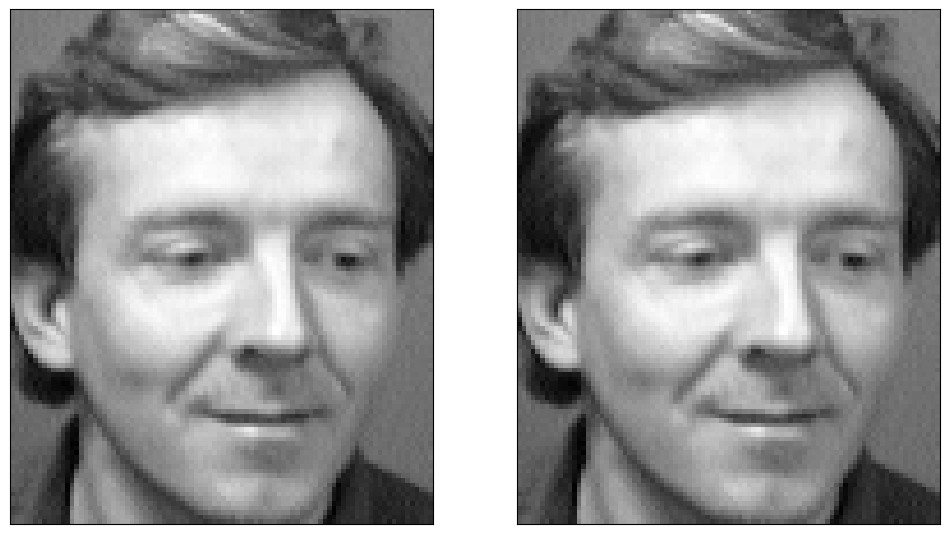

In [111]:
fix, ax = plt.subplots(1, 2, figsize=(12,12),
                       subplot_kw = {'xticks' : [], 'yticks':[]})

ax[0].imshow(im_original, cmap = "gray")
ax[1].imshow(im, cmap = "gray")

In [98]:
data= sklearn.datasets.fetch_olivetti_faces()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [109]:
path = '/content/drive/MyDrive/Developer/data/imagenes'

Se encontraron 0 imágenes, pero se esperaban 50 subfiguras.


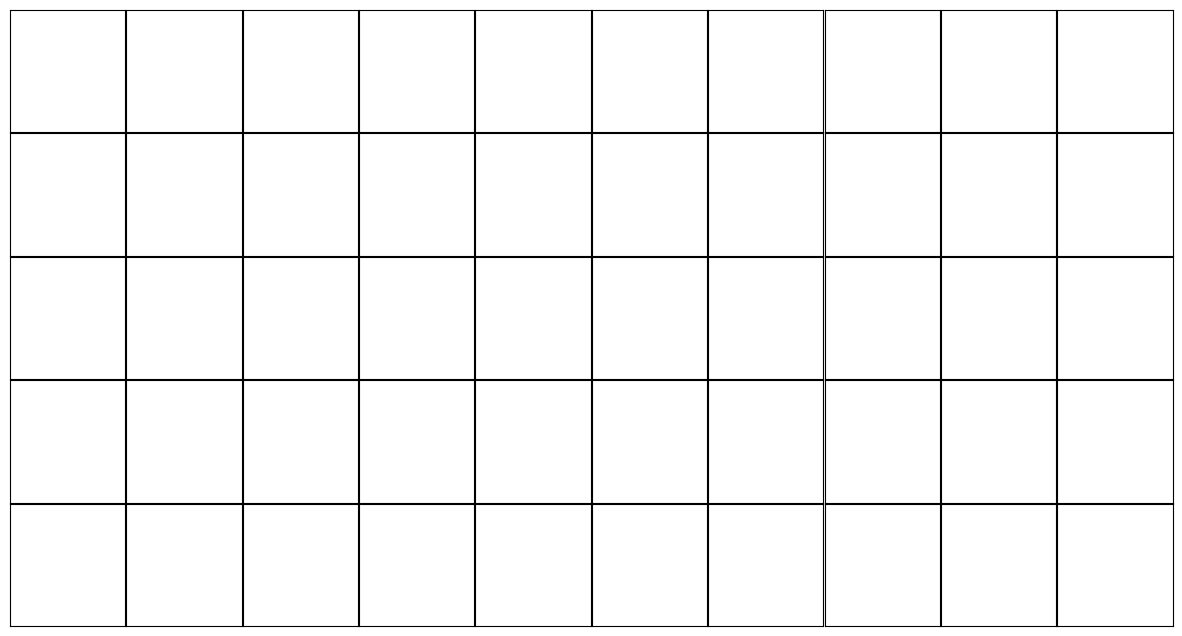

In [110]:
from glob import iglob

caras = pd.DataFrame([])

for path in iglob('.\\imagenes\\*\*.pgm'):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras = caras.append(cara)

fig, axes = plt.subplots(5, 10, figsize=(15,8),
                       subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

num_subfiguras = len(axes.flat)  # Obtener el número de subfiguras en axes
num_imagenes = len(caras.index)  # Obtener el número de imágenes en caras

if num_imagenes < num_subfiguras:
    print(f"Se encontraron {num_imagenes} imágenes, pero se esperaban {num_subfiguras} subfiguras.")
else:
    for i, ax in enumerate(axes.flat):
        if i < num_imagenes:  # Verificar que el índice i esté dentro del rango de índices de caras
            ax.imshow(caras.iloc[i].values.reshape(112,92), cmap = "gray")
        else:
            ax.set_visible(False)  # Ocultar las subfiguras sobrantes

